In [1]:
from qiskit import *
# from qiskit_aer import AerSimulator
import numpy as np

[1 1]


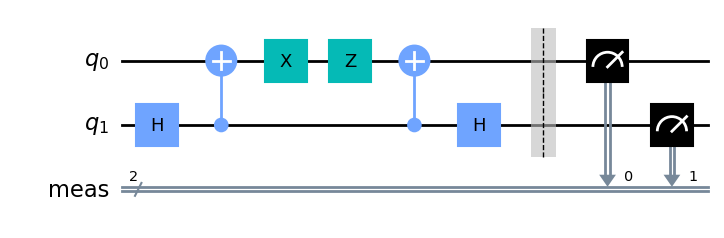

In [11]:
circuit = QuantumCircuit(2)

# Preprepared Bell state for Alice and Bob
circuit.h(1)
circuit.cnot(1,0)

# Alice's random message
bits = np.random.choice([0,1],2)
print(bits)

# Alice Encoding
# 00 - I; 01 - X; 10 - Z; 11 - ZX
if bits[1]:
    circuit.x(0)
if bits[0]:
    circuit.z(0)

# Bob Decoding
circuit.cnot(1,0) # CNOT(Alice, Bob)  now Bob's can be measured to |0> or |1> 
circuit.h(1)      # H(Alice)          Alice's were in |+> or |-> so now we can measure to computational basis

# Measuring
circuit.measure_all()
circuit.draw('mpl')

In [12]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(circuit, backend))
counts = job.result().get_counts()
counts # we measure the transmitted 2 bits 100%

{'11': 1024}